In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
# IMPORT DATA
vehicles = pd.read_excel('databases/cleaned/vehicles_db.xlsx')

In [4]:
people = pd.read_excel('databases/cleaned/people_db.xlsx')

In [5]:
causes = pd.read_excel('databases/cleaned/cause_db.xlsx')

In [7]:
types = pd.read_excel('databases/cleaned/types_db.xlsx')

#### DATA INFORMATION:

The common information among the data sets is the following:

- Accident_ID
- Geographical: Codi_districte, Nom_districte, Codi_barri, Nom_barri, Codi_carrer, Nom_carrer, 
  Coordenada_UTM_X, Coordenada_UTM_Y
- Data, time: Any, Mes_any, Nom_mes, Dia_mes, Descripcio_dia_setmana, Hora_dia

The unique data to each data set is:
- Vehicles: Descripcio_causa_vianant, Descripcio_tipus_vehicle, Descripcio_model, Descripcio_marca, Descripcio_color,
  Descripcio_carnet, Antiguitat_carnet
- People: Descripcio_causa_vianant, Desc_Tipus_vehicle_implicat, Descripcio_sexe, Descripcio_tipus_persona,
  Descripcio_victimitzacio, Edat
- Types: Descripcio_tipus_accident
- Causes: Descripcio_causa_mediata

Data length:
- Vehicles: 166552 (unique accident_ID = 86630)
- People: 102783 (unique accident_ID = 79097)
- Types: 91584 (unique accident_ID = 86670)
- Causes: 86832 (unique accident_ID = 86665)

There seem to be around 86600 accidents in the database. The lower number in the people db might just indicate that some people was not registered?

In [590]:
vehicles['Codi_expedient'].nunique()

86630

#### QUESTIONS

Vehicle-related
- What kind of vehicle is associated with a higher rate of accidents?
- Are red vehicles more often involved in accidents?
- Are old vehicles more likely to suffer an accident?

Geographical/time related
- What neighborhoods have more accidents?
- What month/ day of the week / time of the day are you more likely to have an accident?
- Are there more accidents during a work day or during a weekend day?
- Are accidents equally distributed during the days of the week?
- Are accidents equally distributed during the months?

People-related
- At what age are you more likely to suffer an accident?
- Is there a correlation between license age and accidents?

Causes/types:
- What is the main cause of accidents?
- How likely are you to suffer an accident as a pedestrian?
- How likely are you to survive a car accident?
- Is rain correlated with a higher rate of accidents?
- Has the use of mobile phones increased the rate of accidents?


#### Hypothesis tests

- Do daily means, or hourly means, in order to after have data for hypothesis tests.


#### What districts / neighborhoods have more accidents?

In [20]:
types.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_Y,Coordenada_UTM_X
0,2010S006909,10,Sant Martí,64,el Camp de l'Arpa del Clot,134801,Freser,0176 0176,Dilluns,Dl,Laboral,2010.0,10.0,Octubre,11.0,20.0,Tarda,Atropellament,"4585312,47","431736,08"
1,2010S006757,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0329 0329,Dimarts,Dm,Laboral,2010.0,10.0,Octubre,5.0,16.0,Tarda,Col.lisió lateral,"4585527,16","431983,63"
2,2010S005591,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0268 0268,Divendres,Dv,Laboral,2010.0,8.0,Agost,13.0,15.0,Tarda,Xoc contra element estàtic,"4585099,31","431268,10"
3,2010S008924,10,Sant Martí,64,el Camp de l'Arpa del Clot,161407,Indústria,0258 0258,Divendres,Dv,Laboral,2010.0,12.0,Desembre,24.0,14.0,Tarda,Col.lisió lateral,"4585137,05","431484,86"
4,2010S000187,10,Sant Martí,64,el Camp de l'Arpa del Clot,350308,València,0589 0589,Dissabte,Ds,Laboral,2010.0,1.0,Gener,9.0,14.0,Tarda,Abast,"4584685,43","431964,34"


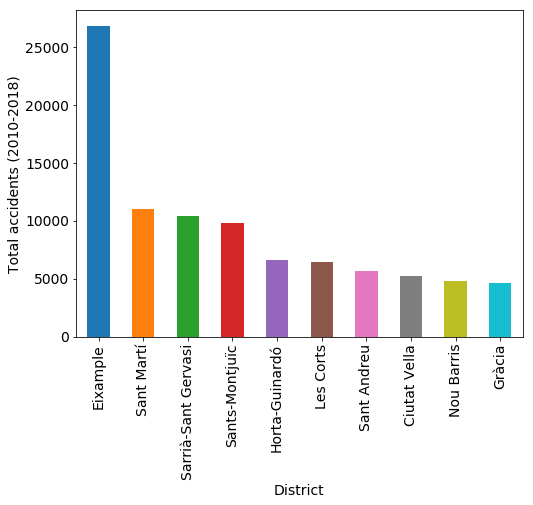

In [463]:
fig, ax = plt.subplots(figsize=(8,6))

ax = types[types['Nom_districte']!='Desconegut'].groupby('Nom_districte').count()['Numero_expedient'].sort_values(ascending=False).plot(kind='bar')

ax.set_ylabel('Total accidents (2010-2018)',fontsize=14)
ax.set_xlabel('District',fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

In [57]:
typ_yr_dist = types[types['Nom_districte']!='Desconegut'].groupby(['NK_Any','Nom_districte']).count()[['Numero_expedient']].reset_index()

In [58]:
typ_yr_dist.head()

,NK_Any,Nom_districte,Numero_expedient
0,2010.0,Ciutat Vella,510
1,2010.0,Eixample,2609
2,2010.0,Gràcia,536
3,2010.0,Horta-Guinardó,796
4,2010.0,Les Corts,693


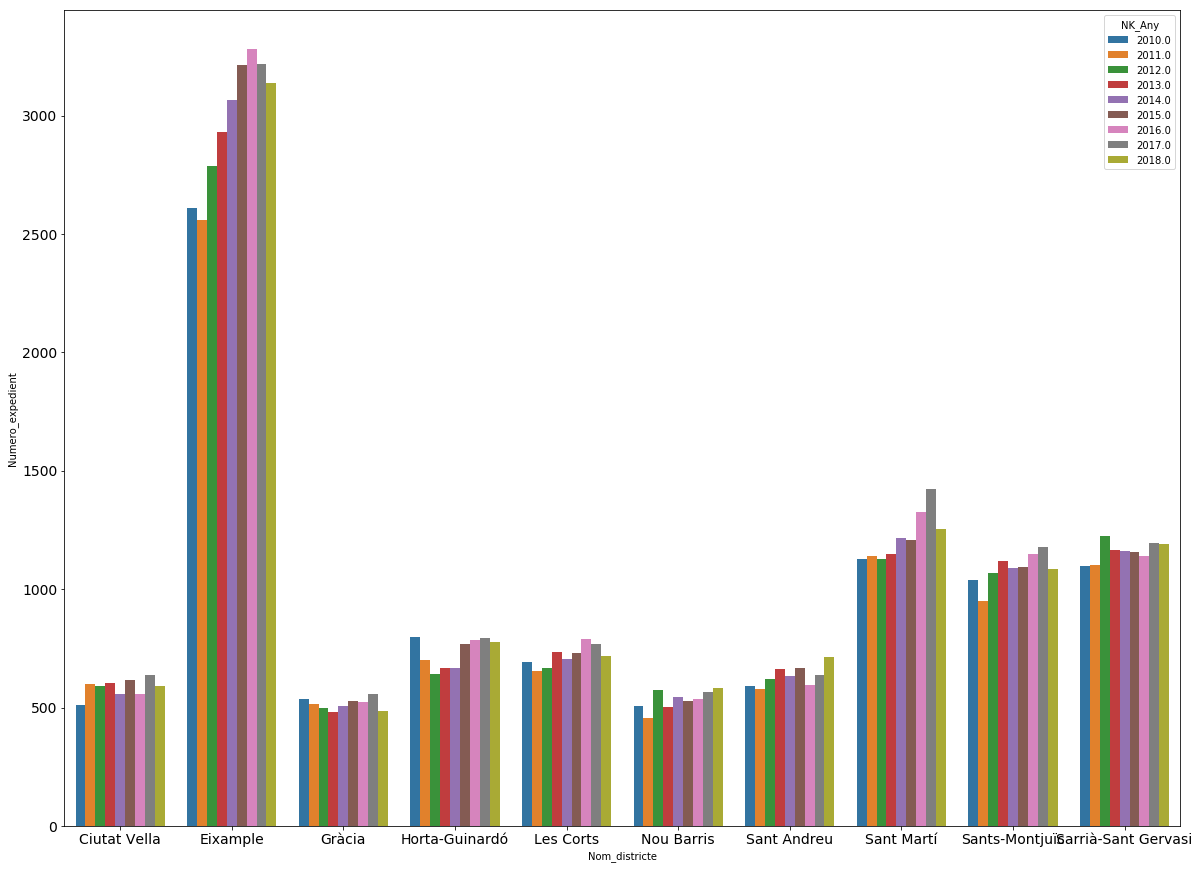

In [78]:
plt.figure(figsize=(20,15))
plt.tick_params(labelsize=14)
sns.barplot(x='Nom_districte',y='Numero_expedient',data=typ_yr_dist,hue='NK_Any')
plt.show()

In [81]:
# Comments:

# l'Eixample is clearly the district in Barcelona where there are more traffic accidents
# In addition, it seems to be the district where the number has increased more.

In [115]:
typ_yr_dist_diffs = typ_yr_dist[typ_yr_dist['NK_Any']==2018][['Nom_districte','Numero_expedient']].reset_index()

In [119]:
typ_yr_dist_diffs.drop('index',axis=1,inplace=True)

In [120]:
typ_yr_dist_diffs.columns = ['Nom_districte','Count_2018']

In [121]:
typ_yr_dist_diffs['Count_2010'] = typ_yr_dist[typ_yr_dist['NK_Any']==2010]['Numero_expedient']

In [127]:
typ_yr_dist_diffs['Diff_value'] = (typ_yr_dist_diffs['Count_2018'] - typ_yr_dist_diffs['Count_2010'])

In [128]:
typ_yr_dist_diffs['Diff_percent'] = (typ_yr_dist_diffs['Count_2018'] - typ_yr_dist_diffs['Count_2010'])/typ_yr_dist_diffs['Count_2010']*100

In [129]:
typ_yr_dist_diffs

,Nom_districte,Count_2018,Count_2010,Diff,Diff_value,Diff_percent
0,Ciutat Vella,592,510,0.160784,82,16.078431
1,Eixample,3137,2609,0.202376,528,20.237639
2,Gràcia,485,536,-0.095149,-51,-9.514925
3,Horta-Guinardó,777,796,-0.023869,-19,-2.386935
4,Les Corts,716,693,0.033189,23,3.318903
5,Nou Barris,583,506,0.152174,77,15.217391
6,Sant Andreu,714,590,0.210169,124,21.016949
7,Sant Martí,1254,1126,0.113677,128,11.367673
8,Sants-Montjuïc,1087,1039,0.046198,48,4.619827
9,Sarrià-Sant Gervasi,1190,1096,0.085766,94,8.576642


In [130]:
# Comments:

# Total number of traffic accidents have increased l'Eixample, followed by Sant Andreu and Sant Marti.
# However, the change in percentage is similar between l'Eixample and Sant Andreu, followed by Ciutat Vell and Nou Barris.

In [132]:
# Other comments:

# There are a lot of important roads passing through l'Eixample, which could justify the higher number of vehicles.
# For more info, check http://www.bcn.cat/estadistica/castella/dades/anuari/cap15/C1511020.htm

# Also, could do a test of differences between 2018 and 2010 to check whether the increase is statistically significant.

In [13]:
# def t_test(df, districts=['Ciutat Vella','Eixample','Gràcia','Horta-Guinardó','Les Corts','Nou Barris','Sant Andreu',
#                            'Sant Martí','Sants-Montjuïc','Sarrià-Sant Gervasi']):
#     results_districts = {}
#     for district in districts:
#         df_dis = df[df['Nom_districte']==district]
#         results_districts[district] = stats.ttest_ind(df_dis[df_dis['NK_Any']==2018]['Numero_expedient'], 
#                                                       df_dis[df_dis['NK_Any']==2010]['Numero_expedient'])
        
#     return results_districts

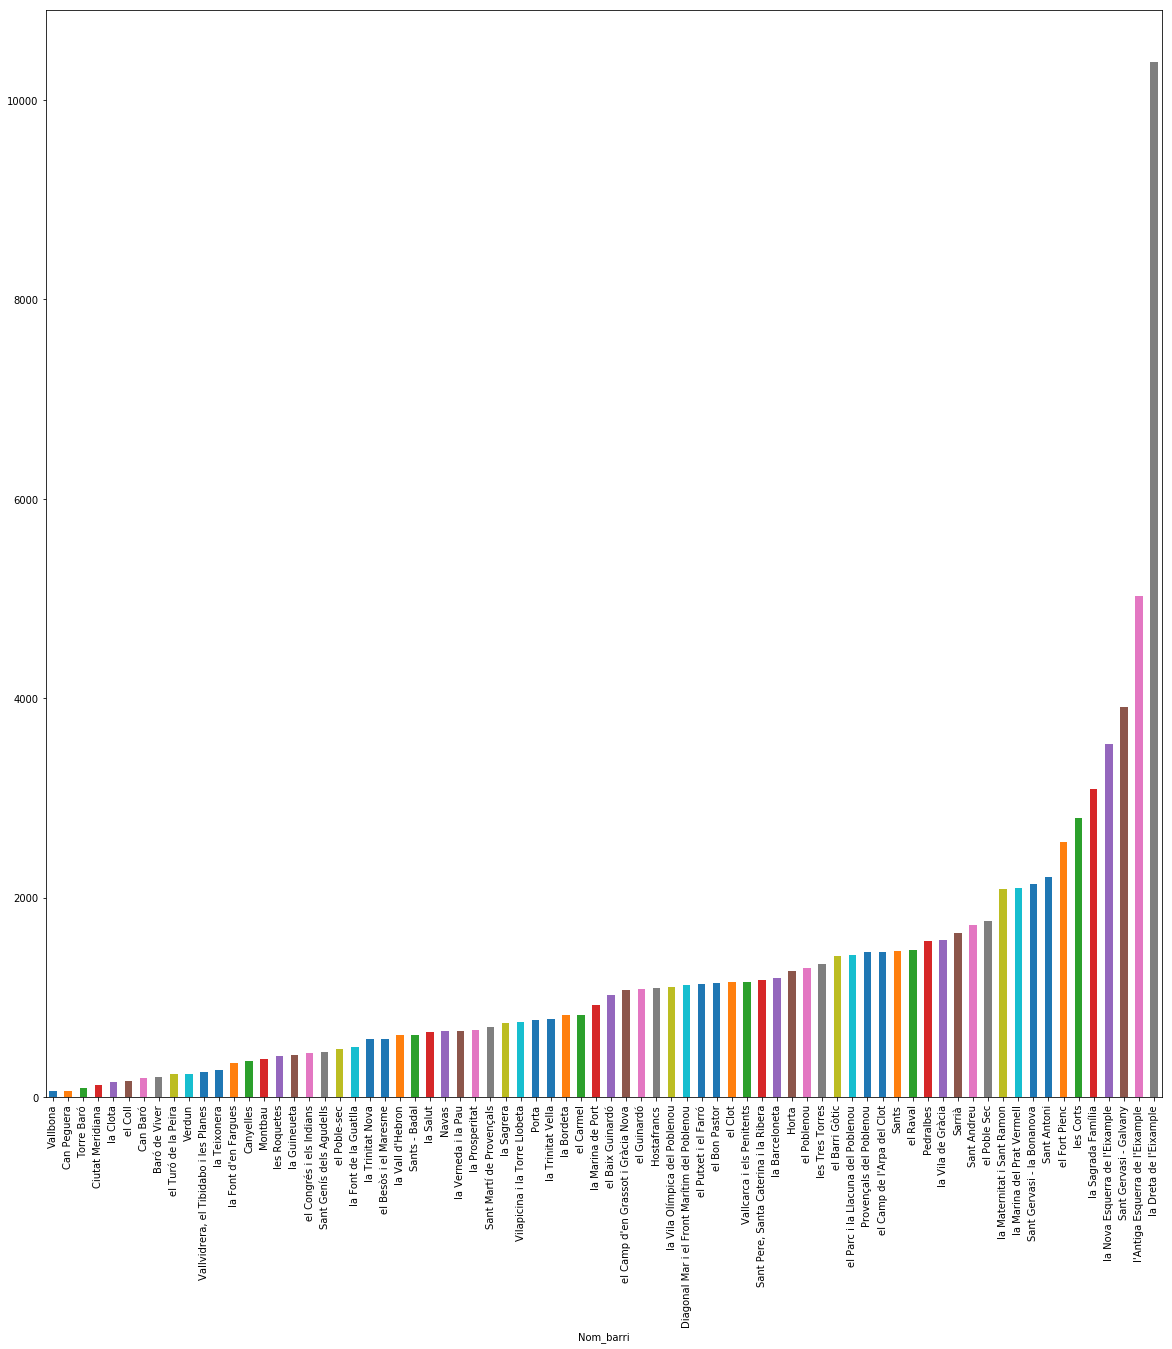

In [30]:
# Check the same but for neighborhoods

plt.figure(figsize=(20,20))
types[types['Nom_barri']!='Desconegut'].groupby('Nom_barri').count()['Numero_expedient'].sort_values().plot(kind='bar')
plt.show()

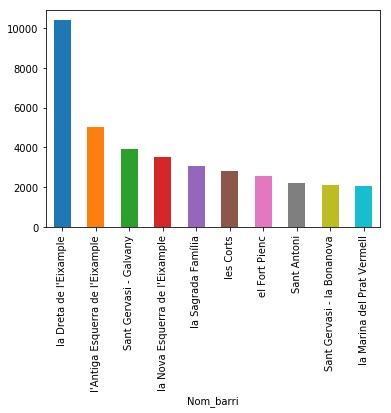

In [460]:
# Check only top 10

types[(types['Nom_barri']!='Desconegut')].groupby('Nom_barri').count()['Numero_expedient'].sort_values()[::-1].head(10).plot(kind='bar')

In [40]:
# Top neighborhoods with highest number of accidents are:
types[(types['Nom_barri']!='Desconegut')].groupby('Nom_barri').count()['Numero_expedient'].sort_values().tail(10)[::-1]

Nom_barri
la Dreta de l'Eixample             10384
l'Antiga Esquerra de l'Eixample     5022
Sant Gervasi - Galvany              3915
la Nova Esquerra de l'Eixample      3541
la Sagrada Família                  3092
les Corts                           2804
el Fort Pienc                       2555
Sant Antoni                         2207
Sant Gervasi - la Bonanova          2140
la Marina del Prat Vermell          2093
Name: Numero_expedient, dtype: int64

In [41]:
# Comments:

# Most of them are located in l'Eixample district (la Dreta de l'Eixample, l'Antiga Esquerra de l'Eixample,
# la Nova Esquerra de l'Eixample, la Sagrada Família, Sant Antoni, el Fort Pienc), 
# Sarrià-Sant Gervasi (Sant Gervasi - Galvany,Sant Gervasi - la Bonanova), and Sants-Montjuïc (la Marina del Prat Vermell)

In [186]:
types.groupby('Nom_carrer').count()['Numero_expedient'].sort_values(ascending=False)[:10]

Nom_carrer
Corts Catalanes        3565
Diagonal               3040
Aragó                  1777
Litoral (Llobregat)    1318
Meridiana              1247
Dalt (Besòs)           1154
València               1104
Gràcia                  985
Litoral (Besòs)         950
Mallorca                935
Name: Numero_expedient, dtype: int64

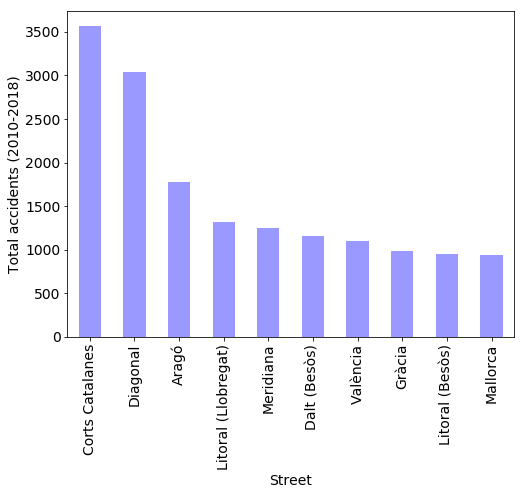

In [467]:
fig, ax = plt.subplots(figsize=(8,6))

ax = types.groupby('Nom_carrer').count()['Numero_expedient'].sort_values(ascending=False)[:10].plot(kind='bar', color='blue',alpha=0.4)

ax.set_ylabel('Total accidents (2010-2018)',fontsize=14)
ax.set_xlabel('Street',fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

#### Are there more accidents during a work day or during a weekend day?

In [343]:
types.head(1)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_Y,Coordenada_UTM_X
0,2010S006909,10,Sant Martí,64,el Camp de l'Arpa del Clot,134801,Freser,0176 0176,Dilluns,Dl,Laboral,2010.0,10.0,Octubre,11.0,20.0,Tarda,Atropellament,"4585312,47","431736,08"


In [50]:
types['Descripcio_tipus_dia'].value_counts()
# All days registered as working days!!!
# Cannot use this information

Laboral    91583
Name: Descripcio_tipus_dia, dtype: int64

In [344]:
types['Descripcio_dia_setmana'].value_counts()

Divendres    15880
Dijous       14943
Dimecres     14863
Dimarts      14466
Dilluns      13808
Dissabte     10003
Diumenge      7620
Name: Descripcio_dia_setmana, dtype: int64

In [348]:
days_dict = {'Dilluns':1,'Dimarts':2,'Dimecres':3,'Dijous':4,'Divendres':5,'Dissabte':6,'Diumenge':7}
types['Dia_setmana_num']  = types['Descripcio_dia_setmana'].map(days_dict)

In [363]:
types.groupby(['NK_Any','Nom_mes','Dia_mes','Dia_setmana_num']).count()['Numero_expedient'].reset_index().sort_values(['NK_Any','Dia_setmana_num'])

,NK_Any,Nom_mes,Dia_mes,Dia_setmana_num,Numero_expedient
4,2010.0,Abril,5.0,1.0,13
11,2010.0,Abril,12.0,1.0,32
18,2010.0,Abril,19.0,1.0,39
25,2010.0,Abril,26.0,1.0,35
31,2010.0,Agost,2.0,1.0,19
38,2010.0,Agost,9.0,1.0,20
45,2010.0,Agost,16.0,1.0,5
52,2010.0,Agost,23.0,1.0,22
59,2010.0,Agost,30.0,1.0,23
66,2010.0,Desembre,6.0,1.0,18


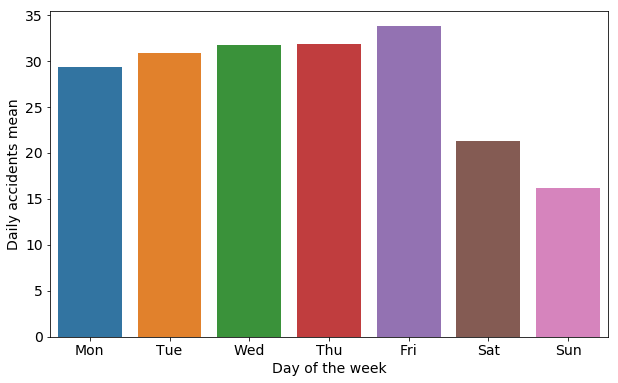

In [371]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='Dia_setmana_num', y='Numero_expedient',data=types.groupby(['NK_Any','Nom_mes','Dia_mes','Dia_setmana_num']).count()['Numero_expedient'].reset_index().sort_values(['NK_Any','Dia_setmana_num']),ci=None)
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylabel('Daily accidents mean',fontsize=14)
ax.set_xlabel('Day of the week',fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

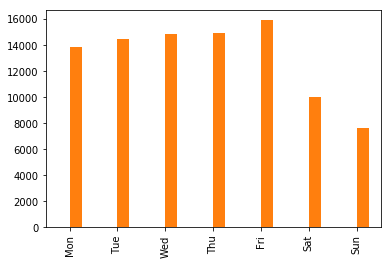

In [351]:
sns.barplot(types['Dia_setmana_num'].value_counts().reset_index().sort_values(by='index'))
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

In [117]:
# Comments

# There are clearly more accidents in working days than weekends.

In [212]:
accident_yr_wday.head()

,NK_Any,Descripcio_dia_setmana,Numero_expedient
0,2010.0,Dijous,1576
1,2010.0,Dilluns,1402
2,2010.0,Dimarts,1553
3,2010.0,Dimecres,1537
4,2010.0,Dissabte,1053


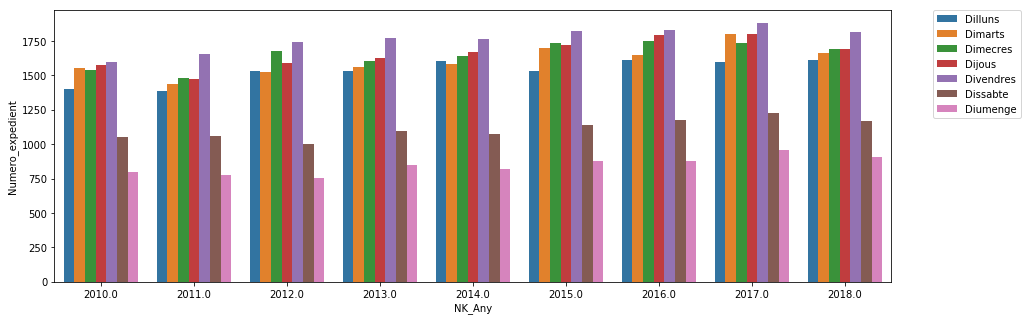

In [182]:
days=['Dilluns','Dimarts','Dimecres','Dijous','Divendres','Dissabte','Diumenge']
plt.figure(figsize=(15,5))
sns.barplot(x='NK_Any',y='Numero_expedient',data=accident_yr_wday, hue='Descripcio_dia_setmana',hue_order=days)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

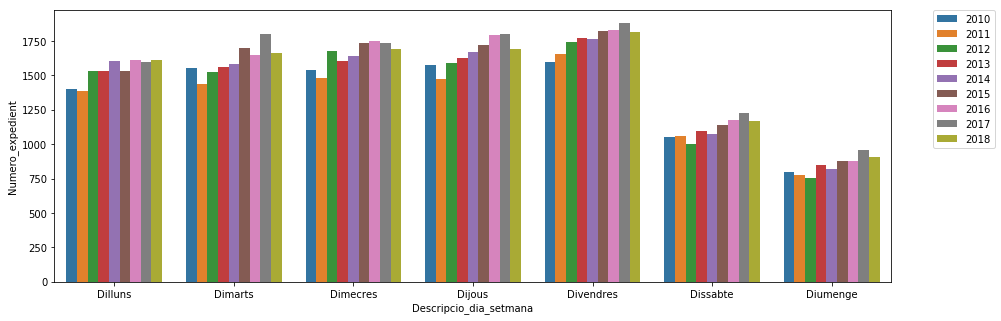

In [183]:
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018]
days=['Dilluns','Dimarts','Dimecres','Dijous','Divendres','Dissabte','Diumenge']
plt.figure(figsize=(15,5))
sns.barplot(x='Descripcio_dia_setmana',y='Numero_expedient',data=accident_yr_wday, order=days, hue='NK_Any',hue_order=years)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

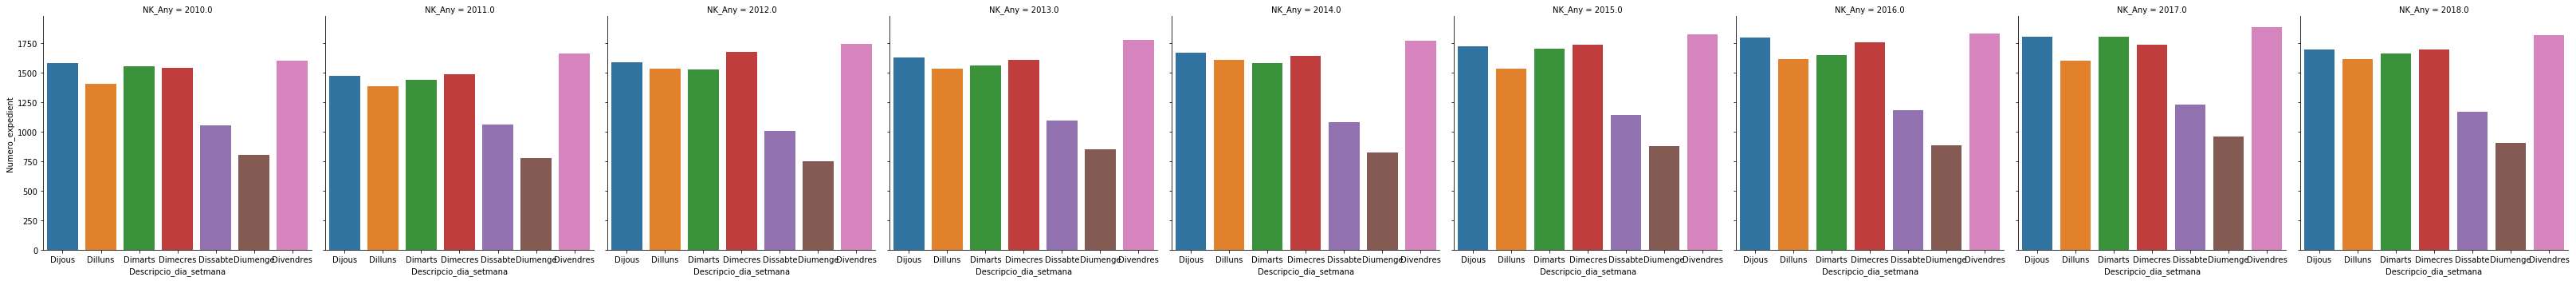

In [210]:
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018]
days=['Dilluns','Dimarts','Dimecres','Dijous','Divendres','Dissabte','Diumenge']

sns.catplot(x="Descripcio_dia_setmana", y="Numero_expedient", col="NK_Any", data=accident_yr_wday, kind="bar")
plt.show()

In [185]:
# Comments

# From the graph, the number of accidents seems to have increased similar over the days of the week

In [9]:
types.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_Y,Coordenada_UTM_X
0,2010S006909,10,Sant Martí,64,el Camp de l'Arpa del Clot,134801,Freser,0176 0176,Dilluns,Dl,Laboral,2010.0,10.0,Octubre,11.0,20.0,Tarda,Atropellament,"4585312,47","431736,08"
1,2010S006757,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0329 0329,Dimarts,Dm,Laboral,2010.0,10.0,Octubre,5.0,16.0,Tarda,Col.lisió lateral,"4585527,16","431983,63"
2,2010S005591,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0268 0268,Divendres,Dv,Laboral,2010.0,8.0,Agost,13.0,15.0,Tarda,Xoc contra element estàtic,"4585099,31","431268,10"
3,2010S008924,10,Sant Martí,64,el Camp de l'Arpa del Clot,161407,Indústria,0258 0258,Divendres,Dv,Laboral,2010.0,12.0,Desembre,24.0,14.0,Tarda,Col.lisió lateral,"4585137,05","431484,86"
4,2010S000187,10,Sant Martí,64,el Camp de l'Arpa del Clot,350308,València,0589 0589,Dissabte,Ds,Laboral,2010.0,1.0,Gener,9.0,14.0,Tarda,Abast,"4584685,43","431964,34"


In [32]:
accidents_by_day = types.groupby(['NK_Any','Mes_any','Descripcio_dia_setmana','Dia_mes']).count()[['Numero_expedient']]

In [36]:
accidents_by_day.head()

Numero_expedient
NK_Any Mes_any Descripcio_dia_setmana Dia_mes                  
2010.0 1.0     Dijous                 7.0                    19
                                      14.0                   30
                                      21.0                   29
                                      28.0                   30
               Dilluns                4.0                    24

In [37]:
accidents_by_day = accidents_by_day.reset_index()

In [45]:
fridays = accidents_by_day[accidents_by_day['Descripcio_dia_setmana']=='Divendres']['Numero_expedient']

In [46]:
mon_thur = accidents_by_day[accidents_by_day['Descripcio_dia_setmana'].isin(['Dilluns','Dimarts','Dimecres','Dijous'])]['Numero_expedient']

In [50]:
print('Fridays mean: ', np.mean(fridays))
print('Monday to Thursday mean: ', np.mean(mon_thur))

Fridays mean:  33.787234042553195
Monday to Thursday mean:  30.942994139584442


In [ ]:
# Hypothesis

# H0: The number of accidents is equal in Fridays compared to the rest of the week
# H1: The number of accidents in Fridays is higher

In [51]:
stats.ttest_ind(fridays, mon_thur)

Ttest_indResult(statistic=6.600600287736314, pvalue=5.046842136151886e-11)

In [ ]:
# The t-statistic is positive and p-value << 0.05. Therefore, we reject the null hypothesis, suggesting that, 
# with 95% confidence, there is a higher number of accidents during Fridays.

In [70]:
mondays = accidents_by_day[accidents_by_day['Descripcio_dia_setmana']=='Dilluns']['Numero_expedient']

In [53]:
tuesdays = accidents_by_day[accidents_by_day['Descripcio_dia_setmana']=='Dimarts']['Numero_expedient']

In [54]:
wednesdays = accidents_by_day[accidents_by_day['Descripcio_dia_setmana']=='Dimecres']['Numero_expedient']

In [55]:
thursdays = accidents_by_day[accidents_by_day['Descripcio_dia_setmana']=='Dijous']['Numero_expedient']

In [56]:
saturdays = accidents_by_day[accidents_by_day['Descripcio_dia_setmana']=='Dissabte']['Numero_expedient']

In [57]:
sundays = accidents_by_day[accidents_by_day['Descripcio_dia_setmana']=='Diumenge']['Numero_expedient']

In [58]:
weekends = accidents_by_day[accidents_by_day['Descripcio_dia_setmana'].isin(['Dissabte','Diumenge'])]['Numero_expedient']

In [60]:
weekday = accidents_by_day[accidents_by_day['Descripcio_dia_setmana'].isin(['Dilluns','Dimarts','Dimecres','Dijous','Divendres'])]['Numero_expedient']

In [ ]:
# Hypothesis

# H0: The number of accidents during the week and during the weekend is the same
# H1: The number of accidents is higher during the week

In [62]:
stats.ttest_ind(weekday, weekends)

Ttest_indResult(statistic=42.312301716667776, pvalue=1.13188483576e-312)

In [63]:
# The t-statistic is positive and p-value << 0.05. Therefore, we reject the null hypothesis, suggesting that, 
# with 95% confidence, there are more accidents during the days of the week.

In [84]:
# Monday is the day with less number of accidents of the working days

# Tuesdays vs Mondays
print(stats.ttest_ind(tuesdays, mondays))
# Wednesdays vs Mondays
print(stats.ttest_ind(wednesdays, mondays))
# Thursdays vs Mondays
print(stats.ttest_ind(thursdays, mondays))
# Fridays vs Mondays
print(stats.ttest_ind(fridays, mondays))

Ttest_indResult(statistic=2.8308445843515053, pvalue=0.0047418512568689905)
Ttest_indResult(statistic=4.436473190515116, pvalue=1.0229646043929038e-05)
Ttest_indResult(statistic=4.705387569142876, pvalue=2.9153397231193652e-06)
Ttest_indResult(statistic=7.597056924997947, pvalue=7.322719442313663e-14)


In [ ]:
# For all the cases, the t-statistic is positive, and the p-value < 0.05.
# Therefore we reject HO (the number of accidents is the same between Monday and another working day)
# suggesting that Mondays are the days with the least number of accidents

In [76]:
print('Mondays mean: ', np.mean(mondays))
print('Tuesdays mean: ', np.mean(tuesdays))
print('Wednesdays mean: ', np.mean(wednesdays))
print('Thursdays mean: ', np.mean(thursdays))
print('Fridays mean: ', np.mean(fridays))
print('Saturdays mean: ', np.mean(saturdays))
print('Sundays mean: ', np.mean(sundays))

Mondays mean:  29.378723404255318
Tuesdays mean:  30.844349680170577
Wednesdays mean:  31.6908315565032
Thursdays mean:  31.86140724946695
Fridays mean:  33.787234042553195
Saturdays mean:  21.282978723404256
Sundays mean:  16.21276595744681


#### What is the month with more accidents?

In [192]:
types.groupby('Mes_any').count()['Numero_expedient']

Mes_any
1.0     7350
2.0     7420
3.0     7935
4.0     7668
5.0     8165
6.0     7849
7.0     7988
8.0     5733
9.0     7244
10.0    8232
11.0    8160
12.0    7839
Name: Numero_expedient, dtype: int64

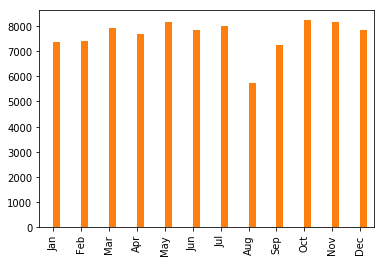

In [200]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

types['Mes_any'].value_counts().reset_index().sort_values(by='index').plot(kind='bar',legend=None)

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], months)
plt.show()

In [202]:
# Comments:

# There are clearly less accidents in the month of august

In [101]:
accidents_by_month = types.groupby(['NK_Any','Nom_mes']).count()['Numero_expedient'].reset_index()

In [103]:
accidents_by_month.head()

,NK_Any,Nom_mes,Numero_expedient
0,2010.0,Abril,782
1,2010.0,Agost,558
2,2010.0,Desembre,822
3,2010.0,Febrer,760
4,2010.0,Gener,800


In [115]:
jan = accidents_by_month[accidents_by_month['Nom_mes']=='Gener']['Numero_expedient']
feb = accidents_by_month[accidents_by_month['Nom_mes']=='Febrer']['Numero_expedient']
mar = accidents_by_month[accidents_by_month['Nom_mes']=='Març']['Numero_expedient']
apr = accidents_by_month[accidents_by_month['Nom_mes']=='Abril']['Numero_expedient']
may = accidents_by_month[accidents_by_month['Nom_mes']=='Maig']['Numero_expedient']
jun = accidents_by_month[accidents_by_month['Nom_mes']=='Juny']['Numero_expedient']
jul = accidents_by_month[accidents_by_month['Nom_mes']=='Juliol']['Numero_expedient']
aug = accidents_by_month[accidents_by_month['Nom_mes']=='Agost']['Numero_expedient']
sep = accidents_by_month[accidents_by_month['Nom_mes']=='Setembre']['Numero_expedient']
ocb = accidents_by_month[accidents_by_month['Nom_mes']=='Octubre']['Numero_expedient']
nov = accidents_by_month[accidents_by_month['Nom_mes']=='Novembre']['Numero_expedient']
dec = accidents_by_month[accidents_by_month['Nom_mes']=='Desembre']['Numero_expedient']

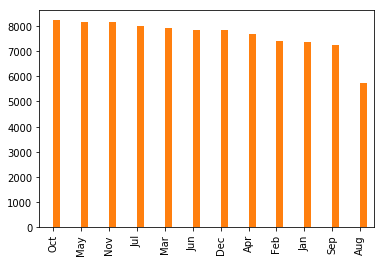

In [122]:
months = ['Oct','May','Nov','Jul','Mar','Jun','Dec','Apr','Feb','Jan','Sep','Aug']

types['Mes_any'].value_counts().reset_index().sort_values(by='Mes_any', ascending = False).plot(kind='bar',legend=None)

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], months)
plt.show()

In [152]:
stats.ttest_ind(may,apr,equal_var=False)

Ttest_indResult(statistic=1.745533994286275, pvalue=0.10009487009340878)

In [153]:
accidents_by_month_day = types.groupby(['NK_Any','Nom_mes','Dia_mes']).count()['Numero_expedient'].reset_index()

In [155]:
jan = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Gener']['Numero_expedient']
feb = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Febrer']['Numero_expedient']
mar = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Març']['Numero_expedient']
apr = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Abril']['Numero_expedient']
may = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Maig']['Numero_expedient']
jun = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Juny']['Numero_expedient']
jul = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Juliol']['Numero_expedient']
aug = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Agost']['Numero_expedient']
sep = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Setembre']['Numero_expedient']
ocb = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Octubre']['Numero_expedient']
nov = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Novembre']['Numero_expedient']
dec = accidents_by_month_day[accidents_by_month_day['Nom_mes']=='Desembre']['Numero_expedient']

In [181]:
stats.ttest_ind(nov,jan,equal_var=False)

Ttest_indResult(statistic=4.780079484290756, pvalue=2.272766931980962e-06)

In [182]:
# Comments 

# The number of accidents is similar among most months of the year.
# The month with the least number of accidents is august (the difference with any other month is significative),
# which is followed by september and january, which are actually the months with holidays where there is less traffic.

In [213]:
types.head(1) 

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,...,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_Y,Coordenada_UTM_X,Dia_setmana_num
0,2010S006909,10,Sant Martí,64,el Camp de l'Arpa del Clot,134801,Freser,0176 0176,Dilluns,Dl,...,2010.0,10.0,Octubre,11.0,20.0,Tarda,Atropellament,"4585312,47","431736,08",1.0


In [382]:
accident_month_hour = types.groupby(['NK_Any','Mes_any','Dia_mes','Hora_dia']).count()['Numero_expedient'].reset_index()

In [386]:
accident_month_hour.head()

,NK_Any,Mes_any,Dia_mes,Hora_dia,Numero_expedient
0,2010.0,1.0,1.0,7.0,1
1,2010.0,1.0,1.0,14.0,2
2,2010.0,1.0,1.0,16.0,1
3,2010.0,1.0,1.0,19.0,1
4,2010.0,1.0,1.0,20.0,1


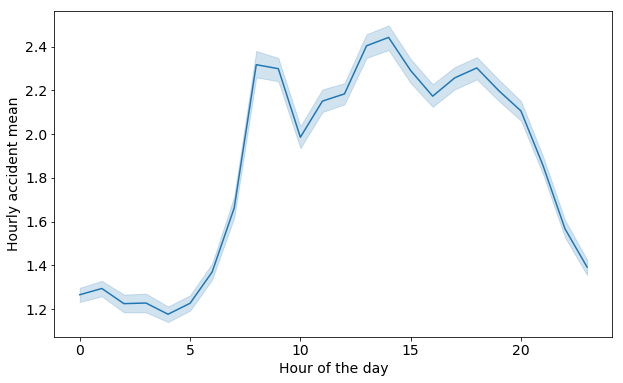

In [388]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(x='Hora_dia',y='Numero_expedient',data=accident_month_hour)

ax.set_ylabel('Hourly accident mean',fontsize=14)
ax.set_xlabel('Hour of the day',fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
# Comments

# There are more accidents during the day

In [280]:
# Now let's check the daily profile but for work days

workdays = types[types['Descripcio_dia_setmana'].isin(['Dilluns','Dimarts','Dimecres','Dijous','Divendres'])]

In [292]:
workdays_hour = workdays.groupby('Hora_dia').count()['Numero_expedient'].reset_index()

In [295]:
# Now let's check the daily profile but for work days

weekends= types[types['Descripcio_dia_setmana'].isin(['Dissabte','Diumenge'])]
weekends_hour = weekends.groupby('Hora_dia').count()['Numero_expedient'].reset_index()

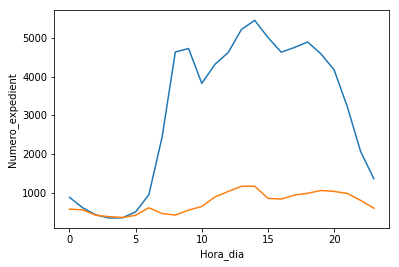

In [296]:
sns.lineplot(x='Hora_dia',y='Numero_expedient',data=workdays_hour)
sns.lineplot(x='Hora_dia',y='Numero_expedient',data=weekends_hour)

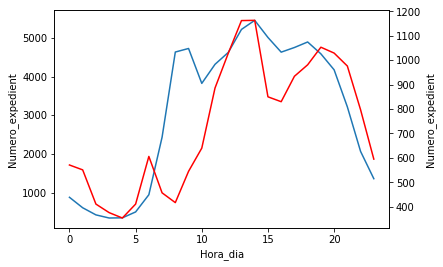

In [304]:
ax = sns.lineplot(x="Hora_dia", y="Numero_expedient", data=workdays_hour)
ax2 = ax.twinx()
sns.lineplot(x="Hora_dia", y="Numero_expedient", ax=ax2, data=weekends_hour, color='red')
plt.show()

In [307]:
# Let's see if there is difference between Saturdays and Sundays:

saturdays= types[types['Descripcio_dia_setmana']=='Dissabte']
saturdays_hour = saturdays.groupby('Hora_dia').count()['Numero_expedient'].reset_index()

sundays= types[types['Descripcio_dia_setmana']=='Diumenge']
sundays_hour = sundays.groupby('Hora_dia').count()['Numero_expedient'].reset_index()

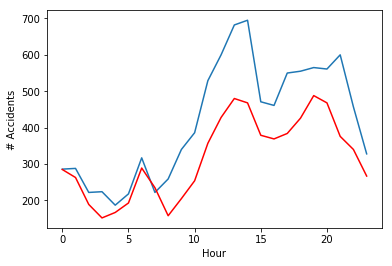

In [325]:
ax = sns.lineplot(x="Hora_dia", y="Numero_expedient", data=saturdays_hour)
sns.lineplot(x="Hora_dia", y="Numero_expedient", data=sundays_hour, color='red')
ax.set_ylabel('# Accidents')
ax.set_xlabel('Hour')
plt.show()

In [ ]:
# Comments

# The daily profile between the workdays and weekdays is clearly different.
# During the workdays, there are three distinguised peaks: the morning (8-9h), midday (13h), and afternoon (17h)

# During the weekdays, there is a morning peak around 5-7h (maybe related to people coming back from partying), midday(12-13h)
# and late afternoon (18-20h)

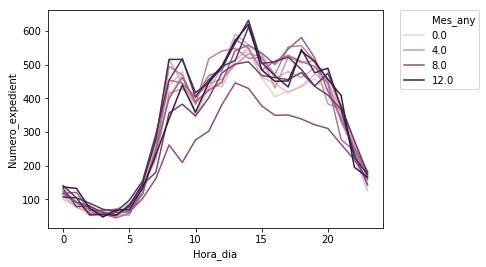

In [230]:
sns.lineplot(x='Hora_dia',y='Numero_expedient',data=accident_month_hour, hue='Mes_any')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

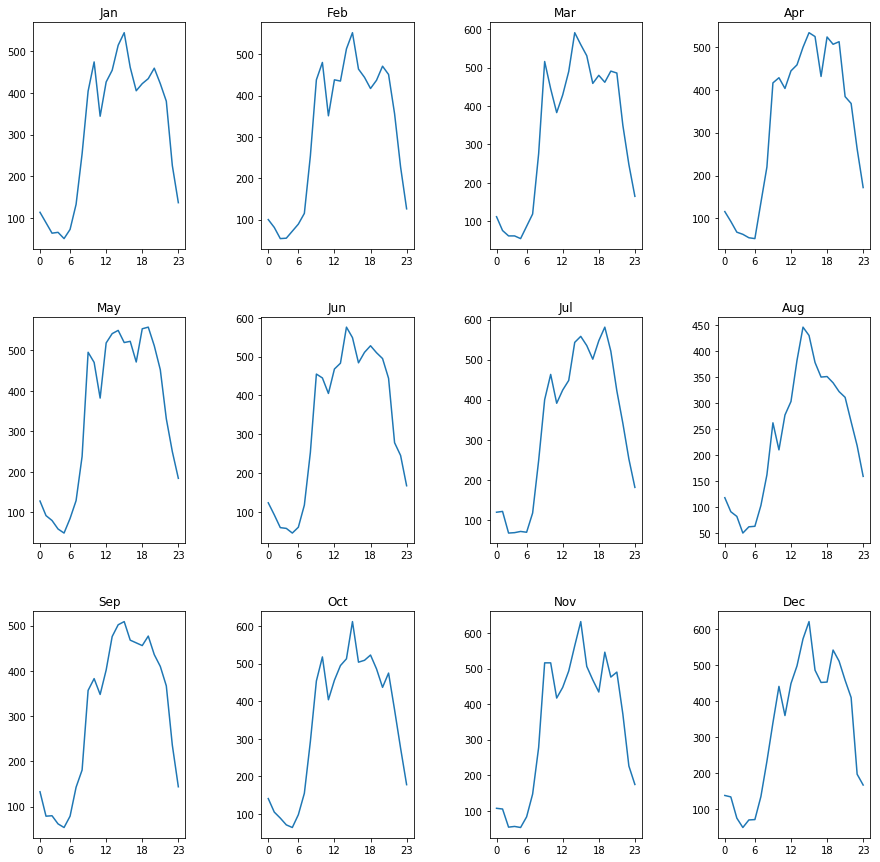

In [272]:
f, axes = plt.subplots(3, 4,figsize=(15,15))
month_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

month = 1
for row in range(3):
    for col in range(4):
        sns.lineplot(x='Hora_dia',y='Numero_expedient',data=accident_month_hour[accident_month_hour['Mes_any']==month],ax=axes[row,col])
        axes[row,col].set_xlabel('')
        axes[row,col].set_ylabel('')
        axes[row,col].set_title(month_dict[month])
        axes[row,col].set_xticks([0,5,11,17,23])
        axes[row,col].set_xticklabels([0,6,12,18,23])
        month += 1
        
f.subplots_adjust(wspace=0.5, hspace=0.3)

plt.show()

#### Accidents by year

In [330]:
types.groupby(['NK_Any','Nom_mes','Dia_mes']).count()['Numero_expedient'].reset_index().head()

,NK_Any,Nom_mes,Dia_mes,Numero_expedient
0,2010.0,Abril,1.0,18
1,2010.0,Abril,2.0,7
2,2010.0,Abril,3.0,8
3,2010.0,Abril,4.0,15
4,2010.0,Abril,5.0,13


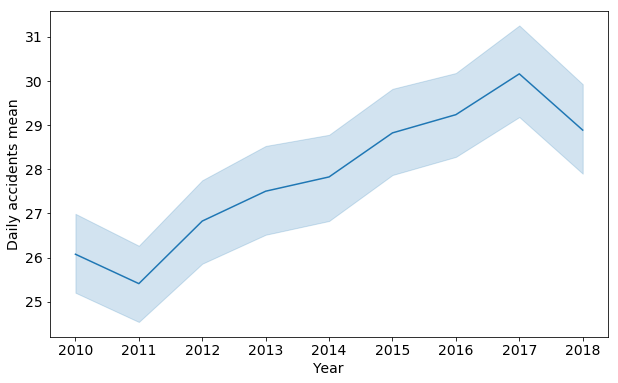

In [341]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(x='NK_Any',y='Numero_expedient', data=types.groupby(['NK_Any','Nom_mes','Dia_mes']).count()['Numero_expedient'].reset_index())
ax.set_ylabel('Daily accidents mean',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
plt.tick_params(labelsize=14)
plt.show()



In [ ]:
sns.lineplot(x='NK_Any',y='Numero_expedient', data=types.groupby(['NK_Any','Nom_mes','Dia_mes']).count()['Numero_expedient'].reset_index())


#### What is the main type of accidents?

In [327]:
types['Descripcio_tipus_accident'].value_counts()

Col.lisió lateral                     20325
Abast                                 18237
Col.lisió fronto-lateral              16915
Atropellament                         10606
Caiguda (dues rodes)                   8786
Xoc contra element estàtic             7111
Abast multiple                         3054
Altres                                 2609
Caiguda interior vehicle               2318
Col.lisió frontal                      1155
Bolcada (més de dues rodes)             332
Encalç                                   44
Desconegut                               43
Sortida de via amb xoc o col.lisió       27
Xoc amb animal a la calçada              15
Resta sortides de via                     3
Sortida de via amb bolcada                3
Name: Descripcio_tipus_accident, dtype: int64

In [334]:
acc_type = types['Descripcio_tipus_accident'].value_counts().reset_index()[:10]

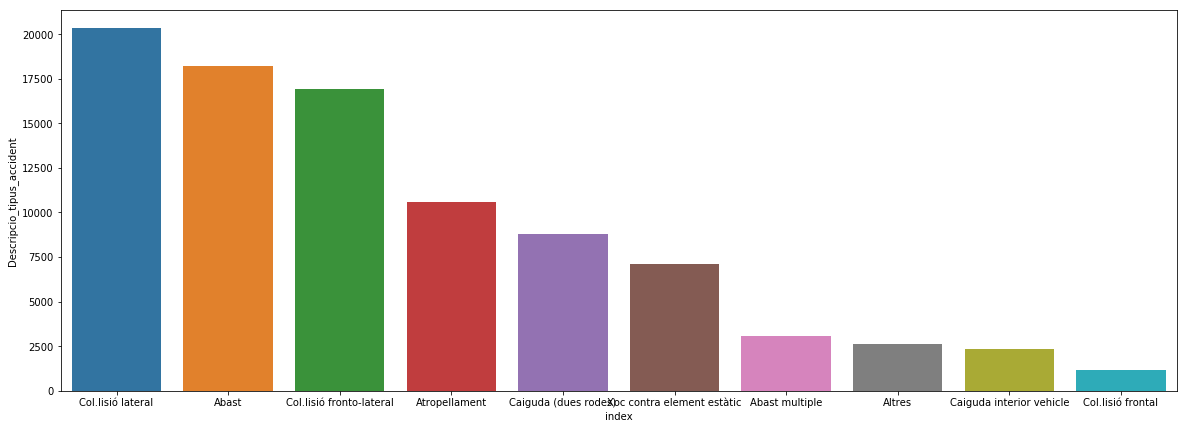

In [340]:
plt.figure(figsize=(20,7))
sns.barplot(x='index',y='Descripcio_tipus_accident', data=acc_type)

In [343]:
causes['Descripcio_causa_mediata'].value_counts()

No hi ha causa mediata             81712
Alcoholèmia                         2886
Excés de velocitat o inadequada      700
Calçada en mal estat                 639
AlcoholŠmia                          393
Exc‚s de velocitat o inadequada      171
Drogues o medicaments                138
Cal‡ada en mal estat                 123
Estat de la senyalització             33
Objectes o animals a la calçada       15
Factors meteorològics                 14
Estat de la senyalitzaci¢              8
Name: Descripcio_causa_mediata, dtype: int64

In [345]:
# Comment:

# Most accidents don't have a registered cause.
# The most common registered cause is Alcohol use

#### What kind of vehicle is associated with a higher rate of accidents?

In [442]:
vehicles.head()

,Codi_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Descripcio_tipus_dia,NK_Any,...,Hora_dia,Descripcio_causa_vianant,Descripcio_tipus_vehicle,Descripcio_model,Descripcio_marca,Descripcio_color,Descripcio_carnet,Antiguitat_carnet,Coordenada_UTM_Y,Coordenada_UTM_X
0,2010S002961,7,Horta-Guinardó,34,Can Baró,170601,José Millán González,Divendres,Laboral,2010,...,23,Creuar per fora pas de vianants,Turismo,GOLF,VOLKSWAGEN,Desconegut,B,3,"4585536,52","429863,89"
1,2010S003114,8,Nou Barris,53,la Trinitat Nova,4409,Aiguablava,Divendres,Laboral,2010,...,15,No és causa del vianant,Ciclomotor,YR,YAMAHA,Negre,AM,1,"4589093,65","431789,16"
2,2010S001244,3,Sants-Montjuïc,11,el Poble Sec,701266,Litoral (Llobregat),Divendres,Laboral,2010,...,15,No és causa del vianant,Furgoneta,BERLINGO,CITROEN,Blanc,B,9,"4578885,90","429949,38"
3,2010S001244,3,Sants-Montjuïc,11,el Poble Sec,701266,Litoral (Llobregat),Divendres,Laboral,2010,...,15,No és causa del vianant,Taxi,TOLEDO,SEAT,Altres,BTP,16,"4578885,90","429949,38"
4,2010S001421,2,Eixample,5,el Fort Pienc,325005,Sicília,Divendres,Laboral,2010,...,14,No és causa del vianant,Furgoneta,TRANSIT,FORD,Blanc,B,5,"4583562,68","431291,81"


In [443]:
vehicles_types = vehicles.groupby('Descripcio_tipus_vehicle').count()['Codi_expedient'].reset_index().sort_values('Codi_expedient',ascending=False)

In [444]:
# There are different names referring to the same (Turismo = Turisme), should correct this in the table.

vehicles['Descripcio_tipus_vehicle'] = np.where(vehicles['Descripcio_tipus_vehicle']=='Turismo', 'Turisme', vehicles['Descripcio_tipus_vehicle'])

In [445]:
# Will also put motorbike and motorcycle in the same group.

vehicles['Descripcio_tipus_vehicle'] = np.where(vehicles['Descripcio_tipus_vehicle']=='Ciclomotor', 'Motocicleta', vehicles['Descripcio_tipus_vehicle'])

In [446]:
vehicles_types = vehicles.groupby('Descripcio_tipus_vehicle').count()['Codi_expedient'].reset_index().sort_values('Codi_expedient',ascending=False)

In [447]:
vehicles_types[:10]

,Descripcio_tipus_vehicle,Codi_expedient
34,Turisme,70048
23,Motocicleta,60617
16,Furgoneta,10757
27,Taxi,8853
7,Bicicleta,6046
2,Autobús,4210
10,"Camión <= 3,5 Tm",2069
11,"Camión > 3,5 Tm",1076
8,"Camió rígid <= 3,5 tones",488
28,Todo terreno,392


In [448]:
vehicles['Codi_expedient'].count()

166551

In [449]:
vehicles_types['percent'] = vehicles_types['Codi_expedient']/166551*100

In [450]:
vehicles_types[:10]

,Descripcio_tipus_vehicle,Codi_expedient,percent
34,Turisme,70048,42.057988
23,Motocicleta,60617,36.395458
16,Furgoneta,10757,6.458682
27,Taxi,8853,5.315489
7,Bicicleta,6046,3.630119
2,Autobús,4210,2.527754
10,"Camión <= 3,5 Tm",2069,1.242262
11,"Camión > 3,5 Tm",1076,0.646048
8,"Camió rígid <= 3,5 tones",488,0.293003
28,Todo terreno,392,0.235363


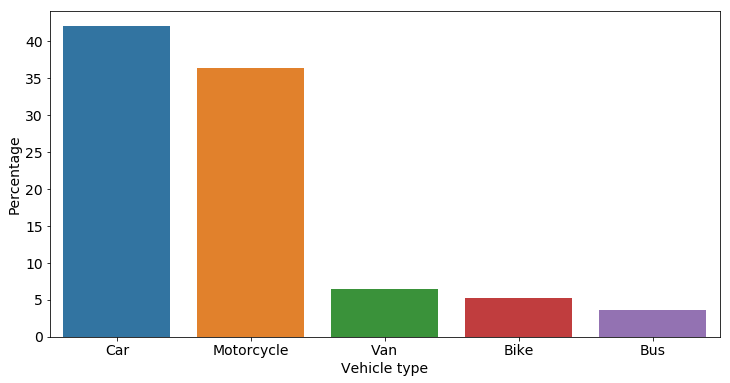

In [458]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x='Descripcio_tipus_vehicle',y='percent',data=vehicles_types[:5])

ax.set_ylabel('Percentage',fontsize=14)
ax.set_xlabel('Vehicle type',fontsize=14)
plt.xticks([0,1,2,3,4], ['Car','Motorcycle','Van','Bike','Bus'])
plt.tick_params(labelsize=14)
plt.show()



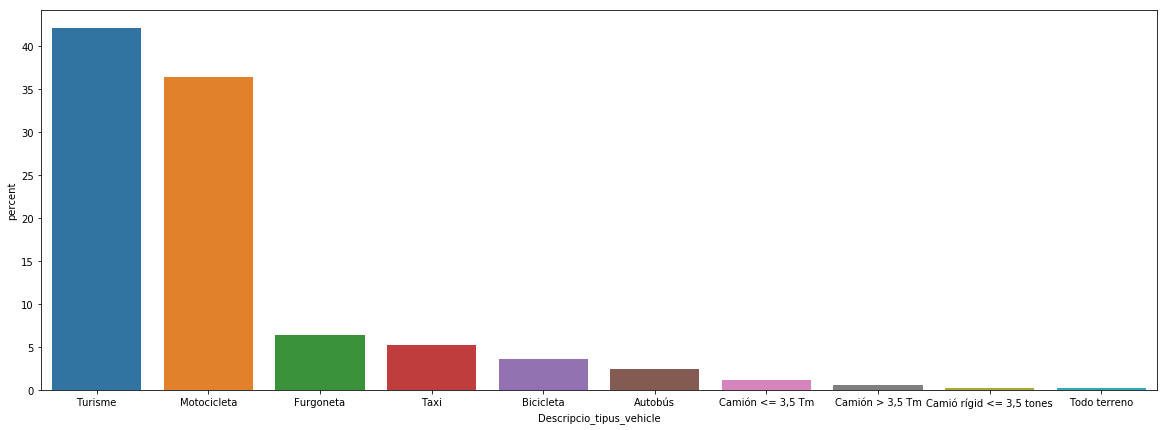

In [379]:
plt.figure(figsize=(20,7))
sns.barplot(x='Descripcio_tipus_vehicle',y='percent',data=vehicles_types[:10])

In [ ]:
df_

In [382]:
# Comments

# Cars are the type of vehicle which is more commonly involved in accidents. 
# In order to get an idea of the magnitude in comparison to the total number of vehicles,
# we can compare to the vehicle fleet in Barcelona (2017).

# In 2017, 565.000 cars, 242.000 motorbikes, 98.000 trucks, and around 18.000 buses in the city of Barcelona.
# Approximately, this results in 63% of cars, 27% of motorbikes, 11% of trucks and 2% of buses.

# If we compare this to the percentage of vehicles involved in accidents, it is clear that motorbikes is the vehicle
# that is more likely to beinvolved in traffic accidents: 36% of vehicles that suffer an accident are motorbikes, 
# while only 27% of the vehicle fleet in Barcelona are motorbikes. 
# In comparison, 42% of vehicles that suffer an accident are cars, while there 63% of the vehicle fleet are cars.

# Of course this is a very rough approximation, since it just takes into account the registered vehicles 
# in the city of Barcelona, not the ones circulating, which might be different since there are a lot of 
# circulating vehicles from the metropolitan area of Barcelona.

#### Are red vehicles more often involved in accidents?

In [494]:
vehicles_colors = vehicles[(vehicles['Descripcio_color']!='Desconegut')&(vehicles['Descripcio_color']!='Altres')]['Descripcio_color'].value_counts().reset_index()

In [495]:
vehicles_colors['percentage'] = vehicles_colors['Descripcio_color'] / np.sum(vehicles_colors['Descripcio_color']) *100

In [497]:
vehicles_colors[:10]

,index,Descripcio_color,percentage
0,Negre,39483,26.344305
1,Gris,35446,23.650691
2,Blanc,32189,21.477518
3,Blau,13890,9.267847
4,Vermell,13600,9.074350
5,Verd,3825,2.552161
6,Negre/Groc,3640,2.428723
7,Groc,2918,1.946982
8,granate,1195,0.797342
9,Platejat,1026,0.684580


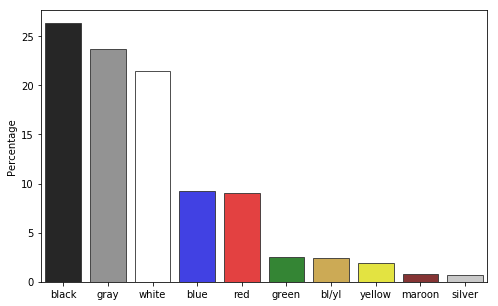

In [500]:
colors = ['black','gray','white','blue','red','green','goldenrod','yellow','maroon','silver']

fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x='index',y='percentage',data=vehicles_colors[(vehicles_colors['index']!='Desconegut')&(vehicles_colors['index']!='Altres')][:10],palette=colors,alpha=0.85,edgecolor=".2")
ax.set_xticklabels(['black','gray','white','blue','red','green','bl/yl','yellow','maroon','silver'])
ax.set_ylabel('Percentage')
ax.set_xlabel('')

plt.show()

In [511]:
colors_ranking = pd.DataFrame([25,22,21,11,10,6,3,1,1],['white','gray','black','silver','blue','red','beige','green','yellow'])

In [515]:
colors_ranking.reset_index(inplace=True)

In [517]:
colors_ranking.columns = ['color','%']

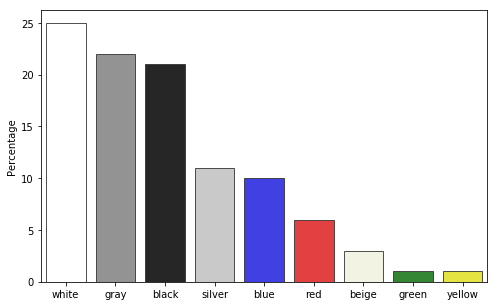

In [518]:
colors = ['white','gray','black','silver','blue','red','beige','green','yellow']

fig, ax = plt.subplots(figsize=(8,5))

ax = sns.barplot(x='color',y='%',data=colors_ranking,palette=colors,alpha=0.85,edgecolor=".2")
ax.set_xticklabels(['white','gray','black','silver','blue','red','beige','green','yellow'])
ax.set_ylabel('Percentage')
ax.set_xlabel('')

plt.show()

In [519]:
# Comments

# According to the Global Automotive 2018 Color Popularity Report, the top sold colors in Europe are:

# 1. White (25%)
# 2. Gray (22%)
# 3. Black (21%)
# 4. Silver (11%)
# 5. Blue (10%)
# 6. Red (6%)
# 7. Beige (3%)
# 8. Green (<1%)
# 9. Yellow (<1%)

# The distribution between the sold colors and the cars that have had accidents is quite similar.
# In fact, if we compare the total number of cars with the top sold colors in Europe (results are similar for the last years)
# we see that, indeed, red cars are more often involved in accidents.

#### Is there a correlation between license age and accidents?

In [390]:
vehicles_license_age = vehicles[vehicles['Antiguitat_carnet']!='Desconegut']

In [391]:
vehicles_license_age.dropna(inplace=True)

c:\users\roger\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [392]:
vehicles_license_age['Antiguitat_carnet'] = vehicles_license_age['Antiguitat_carnet'].astype('int64')

c:\users\roger\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [393]:
vehicles_license_age.dtypes

Codi_expedient              object
Codi_districte              object
Nom_districte               object
Codi_barri                  object
Nom_barri                   object
Codi_carrer                 object
Nom_carrer                  object
Descripcio_dia_setmana      object
Descripcio_tipus_dia        object
NK_Any                       int64
Mes_any                      int64
Nom_mes                     object
Dia_mes                      int64
Hora_dia                     int64
Descripcio_causa_vianant    object
Descripcio_tipus_vehicle    object
Descripcio_model            object
Descripcio_marca            object
Descripcio_color            object
Descripcio_carnet           object
Antiguitat_carnet            int64
Coordenada_UTM_Y            object
Coordenada_UTM_X            object
dtype: object

In [394]:
vehicles_license_age_filter = vehicles_license_age[(vehicles_license_age['Antiguitat_carnet']>=0)&(vehicles_license_age['Antiguitat_carnet']<100)]

In [395]:
license_age_accidents = vehicles_license_age_filter.groupby('Antiguitat_carnet').count()['Codi_expedient'].reset_index()
license_age_accidents.columns = ['Experience (years)','Accident count']

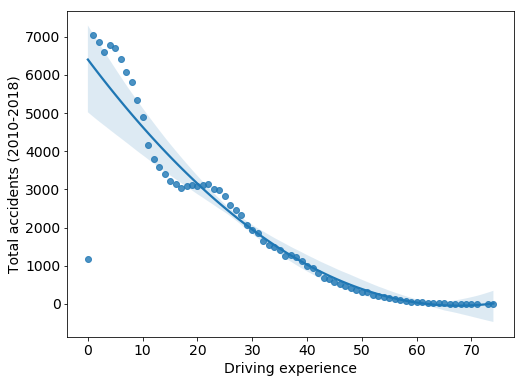

In [398]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.regplot(x='Experience (years)',y='Accident count',data=license_age_accidents,order=2,truncate=True)

ax.set_ylabel('Total accidents (2010-2018)',fontsize=14)
ax.set_xlabel('Driving experience',fontsize=14)
plt.tick_params(labelsize=14)
plt.show()
# Order 2:
# The relationship doesn't seem linear, but quadratic.

# Truncate:
# By default, the regression line is drawn to fill the x axis limits after the scatterplot is drawn. 
# If truncate is True, it will instead by bounded by the data limits.

In [581]:
np.corrcoef(license_age_accidents['Experience (years)'],license_age_accidents['Accident count'])

array([[ 1.        , -0.89694794],
       [-0.89694794,  1.        ]])

In [589]:
# There is clearly a negative correaltion between the experience and the accident count.
# However, it is also possible that there is a higher number of drivers with less experience
# (the data of drivers experience is not available)

# It's quite weird that drivers with 0 years of experience have the least accidents
# (maybe they are less secure and drive super carefully???)

# In conclusion, it seems that the driving experience is a determining factor to the number of accidents.

#### At what age are you more likely to suffer an accident?

In [189]:
people.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,...,Dia_mes,Hora_dia,Descripcio_causa_vianant,Desc_Tipus_vehicle_implicat,Descripcio_sexe,Descripcio_tipus_persona,Edat,Descripcio_victimitzacio,Coordenada_UTM_Y,Coordenada_UTM_X
0,2010S000001,2,Eixample,7,la Dreta de l'Eixample,335100,Tetuan,Divendres,Dv,Laboral,...,1.0,7.0,No és causa del vianant,Motocicleta,Home,Conductor,30,Ferit lleu,"4583198,28","431179,27"
1,2010S000001,2,Eixample,7,la Dreta de l'Eixample,335100,Tetuan,Divendres,Dv,Laboral,...,1.0,7.0,No és causa del vianant,Motocicleta,Home,Conductor,39,Ferit lleu,"4583198,28","431179,27"
2,2010S000002,2,Eixample,5,el Fort Pienc,76807,Sardenya,Divendres,Dv,Laboral,...,1.0,14.0,No és causa del vianant,Ciclomotor,Home,Conductor,39,Ferit lleu,"4583631,60","431444,51"
3,2010S000005,9,Sant Andreu,61,la Sagrera,209900,Meridiana,Divendres,Dv,Laboral,...,1.0,20.0,No és causa del vianant,Motocicleta,Home,Conductor,34,Ferit lleu,"4586479,84","432062,05"
4,2010S000006,10,Sant Martí,67,la Vila Olímpica del Poblenou,62609,Icària,Divendres,Dv,Laboral,...,1.0,21.0,No és causa del vianant,Turismo,Dona,Conductor,32,Ferit lleu,"4582584,02","432826,97"


In [190]:
people['Descripcio_tipus_persona'].value_counts()

Conductor    71218
Passatger    20729
Vianant      10835
Name: Descripcio_tipus_persona, dtype: int64

In [191]:
people.dropna(inplace=True)

In [192]:
people_good = people[people['Edat']!='Desconegut']

In [193]:
people_good['Edat'] = people_good['Edat'].astype('int64')

c:\users\roger\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [194]:
drivers = people_good[people_good['Descripcio_tipus_persona']=='Conductor']

In [195]:
drivers_good = drivers[(drivers['Edat']>=14)&(drivers['Edat']<120)]

In [196]:
drivers_age = drivers_good.groupby('Edat').count()['Numero_expedient'].reset_index()

In [213]:
ages_dist = drivers_good['Edat'].sort_values().reset_index()

In [218]:
ages_dist.drop('index', axis=1, inplace=True)

In [230]:
np.mean(ages_dist)

Edat    36.817369
dtype: float64

In [231]:
np.std(ages_dist)

Edat    12.352095
dtype: float64

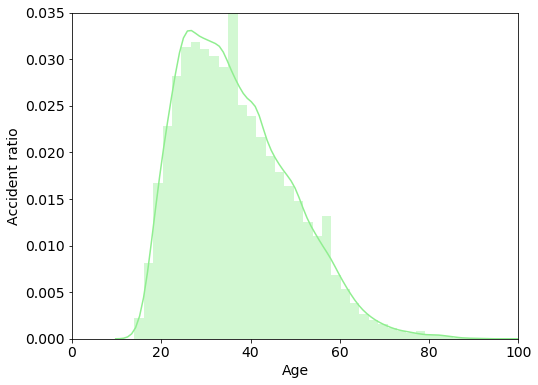

In [404]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.distplot(ages_dist,bins=50,color='lightgreen')
plt.ylim(0,0.035)
plt.xlim(0,100)

ax.set_ylabel('Accident ratio',fontsize=14)
ax.set_xlabel('Age',fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

In [ ]:
# The data seems to follos a Chi-squared distribution with mean = 36.82 and std = 12.35 years

# If we compare this to the normal distribution of the population with a driving license,
# we have a hint that the two distributions are not the same.

# However, we could compare this distribution with a 

In [261]:
drivers_pop_norm = np.random.normal(36.82,12.35,10000)

In [262]:
stats.ks_2samp(ages_dist['Edat'],drivers_pop_norm)

Ks_2sampResult(statistic=0.08073076010340002, pvalue=3.710273988365543e-50)

In [275]:
stats.kstest(ages_dist['Edat'],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [276]:
stats.lognorm.fit(ages_dist['Edat'])

(0.3647306328856241, 2.8142043993071444, 31.84814473642531)

In [278]:
shape, location, scale = stats.lognorm.fit(ages_dist['Edat'])
mu, sigma = np.log(scale), shape

In [ ]:
# With this test, we see that the distribution of the number of accidents as a function of age 
# doesn't follow a normal distribution

In [197]:
drivers_age.columns = ['Age','Accident count']

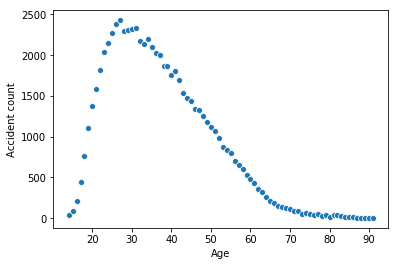

In [198]:
sns.scatterplot(x='Age',y='Accident count',data=drivers_age[drivers_age['Age']<95])

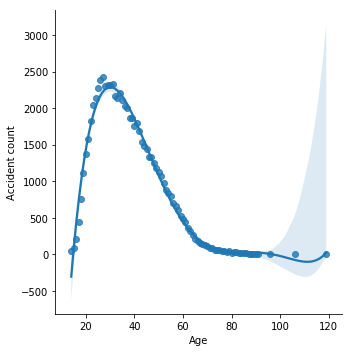

In [202]:
sns.lmplot(x='Age',y='Accident count',data=drivers_age[drivers_age['']],truncate=True,order=5)

In [691]:
# Drivers census obtained from:
# http://www.dgt.es/es/seguridad-vial/estadisticas-e-indicadores/censo-conductores/tablas-estadisticas/

drivers_num = [372371,997536,1467970,1823865,2271758,2519603,2264247,2060967,1791713,1418032,1054545,652090,456200]
drivers_bins = ['18-20','21-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','>74']
drivers_census_df = pd.DataFrame(drivers_num,drivers_bins)

In [695]:
drivers_census_df.reset_index(inplace=True)

In [697]:
drivers_census_df.columns = ['Age','# Drivers']

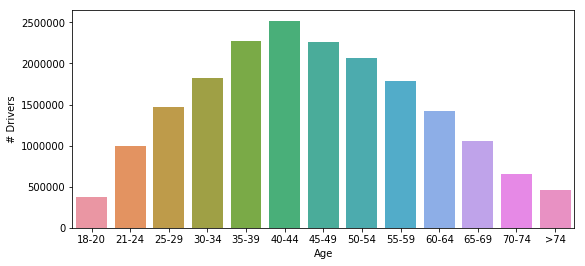

In [720]:
plt.figure(figsize=(9,4))
sns.barplot(x='Age',y='# Drivers',data=drivers_census_df)

In [ ]:
# This data seems to follow a normal distribution with mean = 40-44 (42) and 

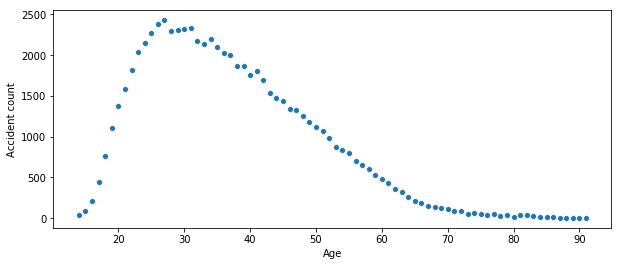

In [722]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='Age',y='Accident count',data=drivers_age[drivers_age['Age']<95])

In [ ]:
# Comments

# The distribution of driving licenses with age seems to follow a normal distribution with a mean at 40-44 years old.
# On the contrary, the number of accidents with age is skewed to the right, with a peak around 30 years old. 

In [435]:
people.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,...,Dia_mes,Hora_dia,Descripcio_causa_vianant,Desc_Tipus_vehicle_implicat,Descripcio_sexe,Descripcio_tipus_persona,Edat,Descripcio_victimitzacio,Coordenada_UTM_Y,Coordenada_UTM_X
0,2010S000001,2,Eixample,7,la Dreta de l'Eixample,335100,Tetuan,Divendres,Dv,Laboral,...,1.0,7.0,No és causa del vianant,Motocicleta,Home,Conductor,30,Ferit lleu,"4583198,28","431179,27"
1,2010S000001,2,Eixample,7,la Dreta de l'Eixample,335100,Tetuan,Divendres,Dv,Laboral,...,1.0,7.0,No és causa del vianant,Motocicleta,Home,Conductor,39,Ferit lleu,"4583198,28","431179,27"
2,2010S000002,2,Eixample,5,el Fort Pienc,76807,Sardenya,Divendres,Dv,Laboral,...,1.0,14.0,No és causa del vianant,Ciclomotor,Home,Conductor,39,Ferit lleu,"4583631,60","431444,51"
3,2010S000005,9,Sant Andreu,61,la Sagrera,209900,Meridiana,Divendres,Dv,Laboral,...,1.0,20.0,No és causa del vianant,Motocicleta,Home,Conductor,34,Ferit lleu,"4586479,84","432062,05"
4,2010S000006,10,Sant Martí,67,la Vila Olímpica del Poblenou,62609,Icària,Divendres,Dv,Laboral,...,1.0,21.0,No és causa del vianant,Turismo,Dona,Conductor,32,Ferit lleu,"4582584,02","432826,97"


In [406]:
drivers = people[people['Descripcio_tipus_persona']=='Conductor']

In [409]:
car_drivers = drivers[drivers['Desc_Tipus_vehicle_implicat'].isin(['Turismo','Turisme'])]
moto_drivers = drivers[drivers['Desc_Tipus_vehicle_implicat'].isin(['Ciclomotor','Motocicleta'])]

In [437]:
moto_state = ['Slightly injured','Seriously injured','Dead']
moto_state_num = [49807,1135,115]
df_moto_state = pd.DataFrame(moto_state,moto_state_num).reset_index()

In [438]:
df_moto_state.columns=['count','state']

In [439]:
df_moto_state

,count,state
0,49807,Slightly injured
1,1135,Seriously injured
2,115,Dead


In [441]:
percent_dead = 115/sum(df_moto_state['count'])*100
percent_dead

0.22523845897722156

In [469]:
survival_rate_moto = (49807+1135)/sum(df_moto_state['count'])*100
survival_rate_moto

99.77476154102278

In [412]:
car_drivers['Descripcio_victimitzacio'].value_counts()

Ferit lleu                                                  9753
Ferit lleu: Hospitalització fins a 24h                      1325
Ferit lleu: Amb assistència sanitària en lloc d'accident     843
Ferit lleu: Rebutja assistència sanitària                    220
Ferit greu                                                    36
Mort                                                          10
Ferit greu: hospitalització superior a 24h                     9
Mort (dins 24h posteriors accident)                            1
Name: Descripcio_victimitzacio, dtype: int64

In [417]:
car_state = ['Slightly injured','Seriously injured','Dead']
car_state_num = [12141,45,11]
df_car_state = pd.DataFrame(car_state,car_state_num).reset_index()

In [419]:
df_car_state.columns=['count','state']

In [423]:
df_car_state

,count,state
0,12141,Slightly injured
1,45,Seriously injured
2,11,Dead


In [434]:
percent_dead = 11/sum(df_car_state['count'])*100
percent_dead

0.09018611133885382

In [470]:
survival_rate_car = (12141+45)/sum(df_car_state['count'])*100
survival_rate_car

99.90981388866115

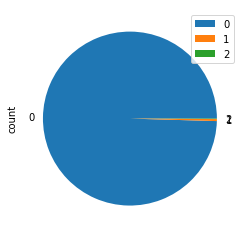

In [431]:
df_car_state.plot(y='count',kind='pie')

In [414]:
moto_drivers['Descripcio_victimitzacio'].value_counts()

Ferit lleu                                                  39624
Ferit lleu: Hospitalització fins a 24h                       6802
Ferit lleu: Amb assistència sanitària en lloc d'accident     3104
Ferit greu                                                    910
Ferit lleu: Rebutja assistència sanitària                     277
Ferit greu: hospitalització superior a 24h                    225
Mort                                                           98
Mort (dins 24h posteriors accident)                            17
Name: Descripcio_victimitzacio, dtype: int64